# 21. 트리의 구현과 순회
##21.2 도입
**트리** : 계층적 구조를 갖는 자료를 표현하기 위한 자료 구조
- 어떤 개념이 다른개념을 포함하면 두 개념을 상위 - 하위로 연결 -> 상위 개념에서 가지 쳐서 뻗어나가는 모습이 실제 나무와 닮아서 이 자료구조를 트리라고 부름.
- 예시 : 이진 검색 트리

### 기초적인 정의와 용어

####트리의 구성 요소
**트리** : 저장된 *노드(node)와 간선(edge)*으로 구성

**노드**
- 노드 간에는 상/하위 관계 존재
-두 노드 연결 시 한 노드는 좀 더 상위, 한 노드는 좀 더 하위에 있어야 함
  - 부모노드 : 두 연결된 노드 중 상위에 있는 노드
  - 자식 노드 :  두 연결된 노드 중 하위에 있는 노드
  - 형제 노드 :부모 노드가 같은 두 노드
  - 선조 : 부모 노드와 부모 노드의 부모들 전부
  -자손 : 자식 노드와 그의 자식들 전부

    - 부모는 하나만 가질 수 있다
    - 한 노드는 여러개의 자식 노드를 가질 수 있다

    - 트리에는 다른 모든 노드들을 자손으로 갖는 노드가 딱 하나 존재 : **루트(root) **
    - **리프 (leaf)** : 자식이 하나도 없는 노드들  



####트리와 노드의 속성
**노드의 깊이** : 루트에서 어떤 노드에 도달하기 위해 거쳐야 하는 간선의 수  
- 깊이가 깊을수록 트리 아래쪽에 있는 노드 지칭

**트리의 높이** : 트리에서 가장 깊숙히 있는 노드의 깊이

####트리의 재귀적 속성

; 트리에서 한 노드와 그의 자손들을 모두 모으면 그들도 하나의 트리가 된다  

t를 루트로 하는 **서브트리(subtree)** : 어떤 노드 t와 그의 자손들로 구성된 트리

모든 트리는 루트와 루트 밑에 있는 서브트리의 집합  

-> 재귀적 속성 때문에 트리 다루는 코드들은 대개 재귀 호출을 통해 구현

####트리의 표현
; 각 노드를 하나의 구조체/객체로 표현하고, 이들을 서로의 포인터로 연결  
; 각 노드들은 자신의 부모와 모든 자손들에 대한 포인터 갖고 있다











In [ ]:
#트리의 노드를 표현하는 객체의 구현
struct TreeNode {
    string label; #저장할 자료(여기는 string이지만 꼭 문자열일 필요는 없음)
    TreeNode* parent;  #부모 노드들 가리키는 포인터
    vector<TreeNode*> children; #자손 노드들 가리키는 포인터의 배열
}

*트리의 구현은 위와 달리 다양할 수 있다  *
Ex. 22장의 이진 검색 트리는 왼쪽, 오른쪽에 최대 하나씩의 자식만을 가질 수 있으므로 자손 노드들의 포인터 담는 배열 대신 두 포인터 left, right로 자식들 저장  
23장의 힙에서는 노드가 들어갈 수 있는 자리 비어 놓지 않고 노드 꽉 채워넣으므로 배열로 트리 내용 표현 가능


##21.2 트리의 순회
트리는 선형 구조가 아님 -> 모든 자료 순회하려면 트리의 재귀적 속성을 이용해야 함  <div>

**트리의 모든 노드 순회** : 주어진 트리의 루트를 방문한 뒤 각 서브트리를 재귀적으로 방문하는 함수 만들어 순회 가능
구현 (c++, python)

In [ ]:
// 주어진 트리의 각 노드에 저장된 값을 모두 출력한다.
void printLabels(TreeNode* root)
{
	// 루트에 저장된 값을 출력한다.
	cout<< root->label <<endl;

	// 각 자손들을 루트로 하는 서브트리에 포함된 값을들 재귀적으로 출력한다.(for문으로 루트 노드 자식들 순회하며 해당 자식 노드들의 값 출력)
for (int i = 0; i < root->children.size(); ++i)
	{
		printLabels(root->children[i]; // printLabels 함수를 재귀적으로 호출하여 현재 자식 노드의 값을 출력 (자식 노드도 재귀적으로 출력)
	}
}

In [ ]:
class TreeNode:
    def __init__(self, label, children=[]):
        self.label = label             #label: 해당 노드에 저장된 값입니다. 트리의 각 노드는 하나의 값을 가지며, 이 값 label에 저장
        self.children = children       # children:  해당 노드의 자식 노드들을 저장하는 리스트

def print_labels(root):
    # 루트에 저장된 값을 출력한다.
    print(root.label)

    # 각 자손들을 루트로 하는 서브트리에 포함된 값을들 재귀적으로 출력한다.
    for child in root.children:         #print_labels 함수가 자신을 재귀적으로 호출 -> 트리의 모든 노드를 방문하 -> 각 노드의 label 값을 출력합니다
        print_labels(child)

순회로 **트리의 높이** 구하기 가능  <div>

: 트리의 높이를 재귀적으로 정의하여 구현
  - 루트의 각 자식들을 루트로 하는 서브트리의 높이를 각각 재귀 호출을 통해 계산
  - *전체 트리의 높이* = 앞서 구한 서브트리들의 높이의 최대치 +1
  - 자손이 없으면 높이가 0

  아래 : 순회를 이용해 트리 높이 계산하는 코드 구현

In [ ]:
// root를 루트로 하는 트리의 높이를 구한다
int height(TreeNode* root)
{
	int h = 0;
	for (int i = 0; i < root->children.size(); ++i)
	{
		// h는 직전까지 계산한 서브트리의 최대 높이이다.
		h = max(h, 1 + height(root->children[i]));
	}
	return h;
}

In [ ]:
class TreeNode:
    def __init__(self, label, children=[]):
        self.label = label
        self.children = children

def height(root): # height 함수 정의
    h = 0         # 높이 저장하는 변수 초기화
    for child in root.children: #root의 자식들 순회, children은 리스트
        # h는 직전까지 계산한 서브트리의 최대 높이이다.
        h = max(h, 1 + height(child)) # 자식노드에 재귀적으로 height 함수 호출 , +1은 자기 자신도 높이에 포함하기 때문, 이전까지 구한 높이 h와 비교하여 더 큰 것 선택 ->현재까지 방문한 서브트리 중
                                      # 가장 큰 높이 갖게 됨
    return h

트리의 순회에 걸리는 *시간* : 트리에 n개 노드 있으면 이들을 모두 순회하는 데 걸리는 시간은 O(N)

### 트리에서 가장 긴 경로 찾기
point : *최장 경로의 양 끝 노드는 항상 루트 혹은 잎 노드*여야 한다.
####최장 경로의 길이  
1) 가장 긴 루트 - 잎 경로의 길이 ( = 트리의 높이 h와 동일)  
2) **가장 긴 잎 - 잎 경로의 길이**


- 잎 - 잎 경로는 항상 어떤 노드까지 쭉 위로 올라가다 다시 쭉 아래로 내려가는 형태
  - 최상위 경로 : 경로가 올라가다가 내려가는 지점
- 1) 트리 순회 과정에서 각 노드마다 그 노드를 최상위 노드로 갖는 가장 긴 잎 - 잎 노드를 계산  
- 2) 그 중 최댓값 선택하기

In [ ]:
int longest;  // 지금까지 찾은 가장 긴 잎 - 잎 경로의 길이

struct TreeNode {
	vector<TreeNode*> children;
};

// node를 루트로 하는 트리의 높이를 리턴한다.
int height(TreeNode* node) {
	vector<int> heights;

	// 모든 자식 노드에 대해서 서브트리의 높이를 구한다.
	for (int i = 0; i < node->children.size(); i++) {
		heights.push_back(height(node->children[i]));
	}

	// 자식 노드가 하나도 없으면 트리의 높이는 0
	if (heights.empty()) return 0;

	sort(heights.begin(), heights.end());

	// 자식 노드가 두개 이상이면 해당 노드를 최상위 노드로 하는 잎 - 잎 경로의 길이를 계산한다.
	// longest의 값을 업데이트 시켜준다.
	if(heights.size() >=2)
		longest = max(longest, heights[heights.size() - 1] + heights[heights.size() - 2] + 2);

	return heights.back() + 1;
}

int solve(TreeNode* root) {
	longest = 0;
	int h = height(root);

	// 트리의 높이와 최대 잎 - 잎 경로의 길이 중 최대값을 리턴한다.
	return max(h, longest);
}

In [ ]:
class TreeNode:
    def __init__(self):
        self.children = []

# node를 루트로 하는 트리의 높이를 리턴한다.
def height(node):
    heights = []

    # 모든 자식 노드에 대해서 서브트리의 높이를 구한다.
    for child in node.children:
        heights.append(height(child))

    # 자식 노드가 하나도 없으면 트리의 높이는 0
    if not heights:
        return 0

    heights.sort()

    # 자식 노드가 두 개 이상이면 해당 노드를 최상위 노드로 하는 잎 - 잎 경로의 길이를 계산한다.
    # longest의 값을 업데이트 시켜준다.
    if len(heights) >= 2:
        global longest
        longest = max(longest, heights[-1] + heights[-2] + 2)
# 위는 두 개 잎 사이의 경로의 전체 길이 계산. height 리스트의 마지막 원소 + 끝에서 두 번째 원소  + 두 개의 edge(두 노드 사이 경로)
#heights[-1] = 한개의 잎 노드 높이 heights[-2] = 다른 한 개의 잎 노드의 높이

    return heights[-1] + 1 #현재 노드를 루트로 하는 서브트리의 높이  + 현재 노드 자체의 높이

#최대 잎 거리를 구하는 부분
def solve(root):
    global longest
    longest = 0 #초기화
    h = height(root) #root를 루트로 하는 트리의 높이 계산

    # 트리의 높이와 최대 잎 - 잎 경로의 길이 중 최대값을 리턴한다.
    return max(h, longest)

height()로 트리 전체의 시간 처리하는 데는 O(n)시간

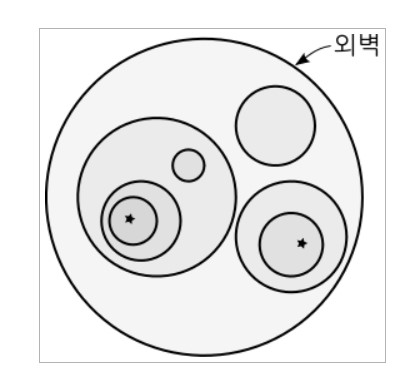

**문제**  

요새가 그림과 같이 커다란 원형 외벽 내에 여러 개의 원형 성벽이 겹겹이 지어진 형태로 구성되어 있는데, 어떤 성벽에도 문이 없어서 성벽을 지나가려면 사다리를 타고 성벽을 오르내려야 합니다.   
요새 내에서 왕래가 불편한 곳들을 연결하는 터널을 만들기로 했습니다.   
이를 위해 요새 내에서 서로 왕래하기 위해 가장 성벽을 많이 넘어야 하는 두 지점을 찾으려고 합니다.   
예를 들어 위 그림의 경우, 별표로 표시된 두 지점 간을 이동하기 위해서는 다섯 번이나 성벽을 넘어야 하지요.  
  
성벽들의 정보가 주어질 때 가장 성벽을 많이 넘어야 하는 두 지점 간을 이동하기 위해 몇 번이나 성벽을 넘어야 하는지 계산하는 프로그램을 작성하세요.
